# Load Dataset

In [15]:
import pickle

In [17]:
print(pickle.format_version)

4.0


In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('dataset.csv').rename(
    {
        'tweet_text': 'text',
        'cyberbullying_type': 'label'
        },
    axis=1
    )
df

Saving dataset.csv to dataset.csv


,Unnamed: 0,text,label
0,0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...,...
52419,52419,Fuck red &amp; white dumb ugly nigger name Way...,ethnicity
52420,52420,Bitch u mad........ I see!!!! RT @tayyoung_: F...,gender
52421,52421,"8.5/10 first of all, i love your profile pictu...",not_cyberbullying
52422,52422,@Dustin___Lee when you find him let me know so...,not_cyberbullying


In [2]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,text,label
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


# Basic EDA

## Overlook

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52424 entries, 0 to 52423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    52424 non-null  object
 1   label   52424 non-null  object
dtypes: object(2)
memory usage: 819.2+ KB


Наблюдения:

*   В датасете отсутствуют незаполненные ячейки

In [4]:
df.describe()

,text,label
count,52424,52424
unique,52424,6
top,"In other words #katandandre, your food was cra...",not_cyberbullying
freq,1,13034


Наблюдения:

*   Тексты распределены на 6 категорий
*   **[OUTDATED]** *Самая частая категория — religion*
*   **[OUTDATED]** *В датасете присутствуют дублирующиеся тексты*

**[UPD]** После объединения датасетов самой частой категорей стала категория *not_cyberbullying*. Кроме того, мы удалили дубликаты при объединении датасетов.

In [5]:
df.sample(15, random_state=0)

,text,label
26983,"In P5, worst case scenario is you get a bad it...",other_cyberbullying
30701,I dont consider a 3 month training program for...,age
16618,I find it rather interesting that as practicin...,religion
14431,@OliverAge24 @sampepper Why wouldn't he ? Beca...,gender
39091,"I was called a ""negro"" in 6th grade. I'm so gl...",ethnicity
27929,Sunday mornings are perfect for sleeping in &a...,other_cyberbullying
51713,@MaxBlumenthal @Campagnebds ...that Blumenthal...,not_cyberbullying
12382,The human rights committee is headed by Saudi ...,gender
16934,@MoAnsar @MaxBlumenthal Probably bcus only foo...,religion
18006,"Illiteracy on its peak... The petrol, diesel y...",religion


В приведённой выборке видны лишь некоторые части текстов, которые можно заменить на плейсхолдеры для лучшего качества работы классификатора. Мы укажем те паттерны, которые мы заменим в текстах, далее, на шаге предобработки.



## Labels Distribution

Text(0.5, 1.0, 'Classes Balance')

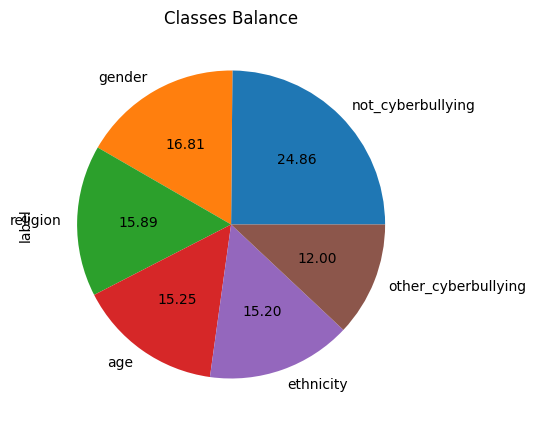

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(10, 5))
df.label.value_counts().plot.pie(autopct="%.2f", ax=axs)
axs.set_title("Classes Balance")

In [7]:
labels_quant = df['label'].value_counts()
labels_percent = [f'{round(_, 4) * 100}%' for _ in df['label'].value_counts(normalize=True)]
pd.DataFrame({'quantity': labels_quant, 'percentage': labels_percent})

,quantity,percentage
not_cyberbullying,13034,24.86%
gender,8810,16.81%
religion,8330,15.89%
age,7993,15.25%
ethnicity,7967,15.2%
other_cyberbullying,6290,12.0%


In [8]:
df.label.value_counts()

not_cyberbullying      13034
gender                  8810
religion                8330
age                     7993
ethnicity               7967
other_cyberbullying     6290
Name: label, dtype: int64

**[OUTDATED]** *Как мы видим, датасет сбалансирован, все классы содержат примерно равное количество текстов. Всего имеем 6 классов с количеством текстов от 7800 до 8000. Каждый класс составляет 16-17% всего датасета.*

**[UPD]** После объединения появился некоторый дисбаланс в классах, но он не критичен. Всего имеем 6 классов с количеством текстов от 6290 до 13034. Каждый класс составляет не более четверти от всего датасета.

## Text lengths

### Average text length

#### In symbols

array([[<Axes: title={'center': 'text_len'}>]], dtype=object)

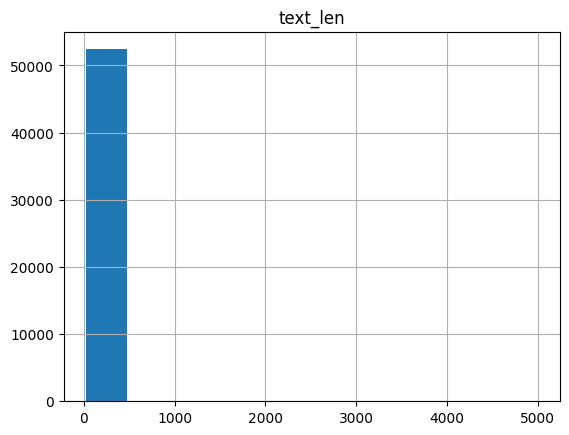

In [10]:
df['text_len'] = [len(text) for text in df['text']]
df.hist(column='text_len', rwidth=0.9)

Mean length in symbols

In [11]:
round(sum(len(text) for text in df['text']) / len(df['text']), 2)

132.82

#### In tokens

array([[<Axes: title={'center': 'tokenized_text_len'}>]], dtype=object)

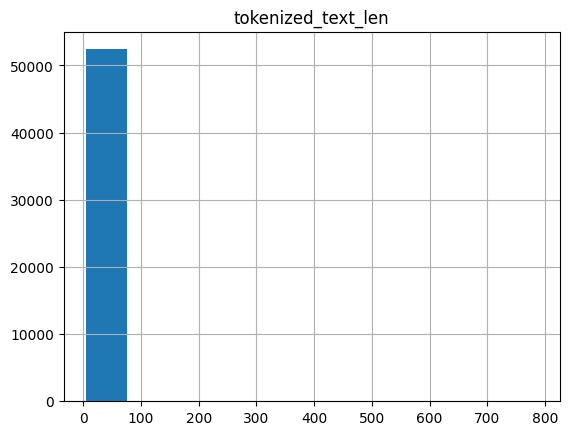

In [12]:
df['tokenized_text_len'] = [len(text.split()) for text in df['text']]
df.hist(column='tokenized_text_len', rwidth=0.9)

Mean length in tokens

In [13]:
round(sum(len(text.split()) for text in df['text']) / len(df['text']), 2)

22.96

In [14]:
# Clear abundant columns
df.drop('text_len', axis=1, inplace=True)
df.drop('tokenized_text_len', axis=1, inplace=True)
df.head()

,text,label
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


Мы видим большие значения на осях X графиков, что может свидетельствовать о наличии аномалий в датасете. Проверим самые длинные и короткие тексты в датасете.

### Longest and Shortest texts

In [15]:
longest_text = max(df['text'], key=len)
print(f'''Longest text: "{longest_text}",
Symbols count:{len(longest_text)},
Words count: {len(longest_text.split())}''')

Longest text: "is feminazi an actual word with a denot…
@Nasharchy my job means protecting people. even the people i don't agree with/like.
They barely cooked anything on that entrée #MKR
RT @kf: Like, no. If a community fostering jerks prevents users from adopting that community's code, it is very much a technical problem.
It's almost time. :)
@JamesGweenwood shock youre bullying me again.
@LionLionEatEat yeah, someone DMed me a screenshot. meh. let her. i have no idea who she even is.
For more egregious cases for harassment, we definitely need to be able to respond to those appropriately. But most toxicity isn't this.
So, this happened. http://t.co/ZPTRtsYFiV
@Nibelsnarfabarf @srhbutts @GRIMACHU it is really funny all the assumptions they make about how it works - and how much they are wrong.
The lack of self-awareness from @wadhwa right now is staggering and hilarious. #stopwadhwa2015
Hahahaha http://t.co/JRPkJCNVH9
This is going to be a better finale than how I met your mother, one

In [16]:
df[df['text'].str.contains("is feminazi an actual word with a denot")]

,text,label
25924,is feminazi an actual word with a denotation?,other_cyberbullying
28076,is feminazi an actual word with a denot…\r\n@N...,other_cyberbullying
52320,is feminazi an actual word with a denot…,not_cyberbullying


Видим наличие аномально большого текста. Судя по отсутствию контекстуальной связи между его частями, этот текст был ошибочно добавлен в датасет: либо из-за несовершенства парсера, обрабатывавшего собранные микросообщения, либо из-за возникшей во время парсинга ошибки. Это подтверждается также разделом «обсуждение» на сайте Kaggle, где и был выложен данный датасет — там также пришли ко мнению о том, что это ошибка.

**[OUTDATED]** *Дальнейшее изучение текстов показало, что такой случай не единичный. В итоге нами было принято решение удалить такие тексты из датасета. Мы аргументируем наш выбор следующими доводами: во-первых, попытка разделить и разметить проблемные тексты отняла бы много времени, поскольку такой случай не единичный, и в итоге текстов, которые должны быть размечены в отдельности, набирается довольно много. Кроме того, у нас нет возможности проверить правильность возможной разметки, таким образом, неправильная разметка может сказаться на качестве работы модели. В случае же, если бы мы просто разделили эти тексты и добавили в датасет неразмеченными, от них было бы мало смысла, так как их нельзя было бы использовать ни в обучении, ни в валидации модели по причине отсутствия разметки.*

**[UPD]** В этот раз мы вручную доразметили «склеенные» тексты и включили их в итоговую версию объединённого датасета. Мы решили не удалять «склеенные» варианты при объединении, поскольку этот шаг уже был реализован в этой работе.

Для удаления больших текстов мы решили опираться на паттерн, а не длину сообщений, поскольку на неё влияют добавленные в сообщение ссылки, смайлики и проч., увеличивающие реальную длину сообщения в символах. Мы выявили, что ошибочные тексты содержат сочетание символов *\r\n* и удалили все тексты, содержащие данное сочетание символов.

In [3]:
df = df.loc[df['text'].str.contains("\r\n")==False]
df = df.reset_index(drop=True)
df.shape

(52401, 2)

In [25]:
longest_text = max(df['text'], key=len)
print(f'''Longest text: "{longest_text}",
Symbols count:{len(longest_text)},
Words count: {len(longest_text.split())}''')

Longest text: "(2/2) The MO State Constitution (Art. VI sec 18(c)) prohibits charter counties from exercising any power over the school functions. Will the school boards and school superintendents in St. Louis County stand up to Page the bully? https://www.stltoday.com/news/local/metro/page-says-more-restrictions-in-st-louis-county-possible-if-coronavirus-cases-continue-to-grow/article_c11b1fb1-7f78-56ac-98d8-07cbfb7bbb39.html#utm_source=stltoday.com&amp;utm_campaign=%2Fnewsletter-templates%2Fpolitical-fix&amp;utm_medium=PostUp&amp;utm_content=5bd8b4b585b0024e0c7fb4d8f9ec3274bc64a6fe",
Symbols count:575,
Words count: 38


In [26]:
shortest_text = min(df['text'], key=len)
print(f'''Shortest text: "{shortest_text}",
Symbols count:{len(shortest_text)},
Words count: {len(shortest_text.split())}''')

Shortest text: "💩",
Symbols count:1,
Words count: 1


In [4]:
labels_quant = df['label'].value_counts()
labels_percent = [f'{round(_, 4) * 100}%' for _ in df['label'].value_counts(normalize=True)]
pd.DataFrame({'quantity': labels_quant, 'percentage': labels_percent})

,quantity,percentage
not_cyberbullying,13031,24.87%
gender,8806,16.81%
religion,8329,15.89%
age,7992,15.25%
ethnicity,7961,15.190000000000001%
other_cyberbullying,6282,11.99%


Как видим, наши изменения не сказались на балансе классов в датасете, поскольку их количество всё ещё остаётся достаточно большим.

### Check average text length again

#### In symbols

array([[<Axes: title={'center': 'text_len'}>]], dtype=object)

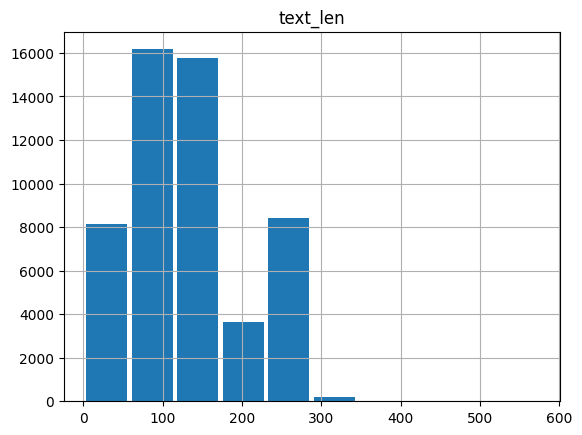

In [21]:
df['text_len'] = [len(text) for text in df['text']]
df.hist(column='text_len', rwidth=0.9)

Mean length in symbols

In [27]:
round(sum(len(text) for text in df['text']) / len(df['text']), 2)

132.27

#### In tokens

array([[<Axes: title={'center': 'tokenized_text_len'}>]], dtype=object)

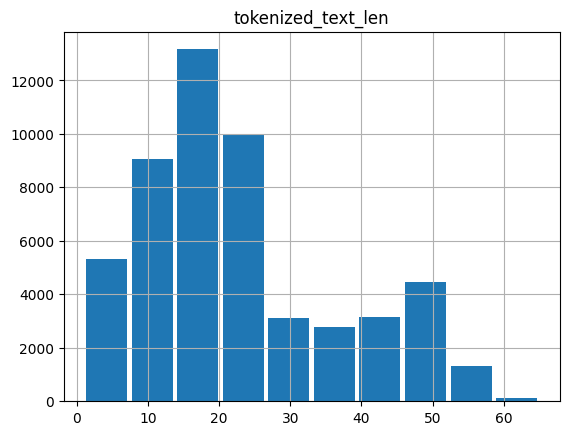

In [23]:
df['tokenized_text_len'] = [len(text.split()) for text in df['text']]
df.hist(column='tokenized_text_len', rwidth=0.9)

Mean length in tokens

In [29]:
round(sum(len(text.split()) for text in df['text']) / len(df['text']), 2)

22.87

In [30]:
# Clear abundant columns
df.drop('text_len', axis=1, inplace=True)
df.drop('tokenized_text_len', axis=1, inplace=True)
df.head()

,text,label
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


В результате мы имеем датасет, содержащий тексты длиной от одного до шестисот символов и от одного до семидесяти слов.

Наибольшее количество текстов при этом состит из 50-и — 150-и символов и 10-и — 25-и слов.

# Preprocessing

Для лучшего понимания укажем те паттерны и части текстов, которые мы решили заменить на плейсхолдеры:

*   Теги пользователей (@User_Tag1 → USER_TAG_PLACEHOLDER);
*   Ссылки (http://...; https://...; pic.twitter.com/... → LINK_PLACEHOLDER);
*   Эмодзи (:); &#128514; :•) → EMOTE_PLACEHOLDER);
*   Даты (2000s → YEAR_PLACEHOLDER);
*   Числа (11; 1/3 → DIGITS_PLACEHOLDER).

Заметим, что после обсуждения мы пришли к отказу от замены хэштегов, поскольку они также могут являться ярким маркером кибербуллинга.

In [5]:
!python -m pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 6.0 MB/s eta 0:00:00


In [6]:
import re
import emoji
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize

def replace_mentions(text: str) -> str:
  return re.sub(r"@\w*", 'USER_TAG_PLACEHOLDER', text)

def replace_urls(text: str) -> str:
  # sourced: https://urlregex.com/
  return re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", 'LINK_PLACEHOLDER', text)

def replace_emotes(text: str) -> str:
  text = re.sub(r"((?::|;|=)(?:-)?(?:\)|D|P|O|\\|/|\())", 'EMOTE_PLACEHOLDER', text)
  text = emoji.demojize(text)
  return text

def replace_dates(text: str) -> str:
  return re.sub(r"\d{4}s?", 'DATE_PLACEHOLDER', text)

def replace_numerals(text: str) -> str:
  return re.sub(r"\b\d[\d\.,/]*(st|th|rd|nd)?\b", 'NUMERAL_PLACEHOLDER', text)

def replace_repetitions(text: str) -> str:
  return re.subre.sub(r"(.)\1{2,}", r"\1\1", text)

def lemmatize(text: str) -> str:
  lemmatizer = WordNetLemmatizer()
  return " ".join([lemmatizer.lemmatize(token) for token in re.findall(r"\w*", text)])

def lowercase(text: str) -> str:
  return text.lower()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [7]:
df['filtered_text'] = df['text'] \
    .apply(replace_mentions) \
    .apply(replace_urls) \
    .apply(replace_emotes) \
    .apply(replace_dates) \
    .apply(replace_numerals) \
    .apply(lemmatize) \
    .apply(lowercase)

In [8]:
df.sample(15, random_state=23)

,text,label,filtered_text
175,RT @jurijuri: @freebsdgirl It's like Total Rec...,not_cyberbullying,rt user_tag_placeholder user_tag_placeholde...
193,@rileysomething I'm not adverse to putting boo...,not_cyberbullying,user_tag_placeholder i m not adverse to ...
46547,Her laugh is horrendous #MKR,not_cyberbullying,her laugh is horrendous mkr
25582,BIATCH stop bullying @christellelin !!! WE DON...,other_cyberbullying,biatch stop bullying user_tag_placeholder ...
5516,@tmclaughbos ... and this is why i hate that b...,not_cyberbullying,user_tag_placeholder and this is why ...
31414,The girl who bullied me the most in high schoo...,age,the girl who bullied me the most in hi...
34636,Quinn the Queer and Quinn the Queef were my ni...,age,quinn the queer and quinn the queef wer...
5495,@Holbornlolz The PKK haven't been communist fo...,not_cyberbullying,user_tag_placeholder the pkk haven t been...
21193,It doesn't matter if you're marxist. You can l...,religion,it doesn t matter if you re marxist y...
47069,@kcgreenn Do you have any comment?,not_cyberbullying,user_tag_placeholder do you have any comm...


In [9]:
df.drop_duplicates('filtered_text', inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(51592, 3)

# Word Cloud

<Axes: >

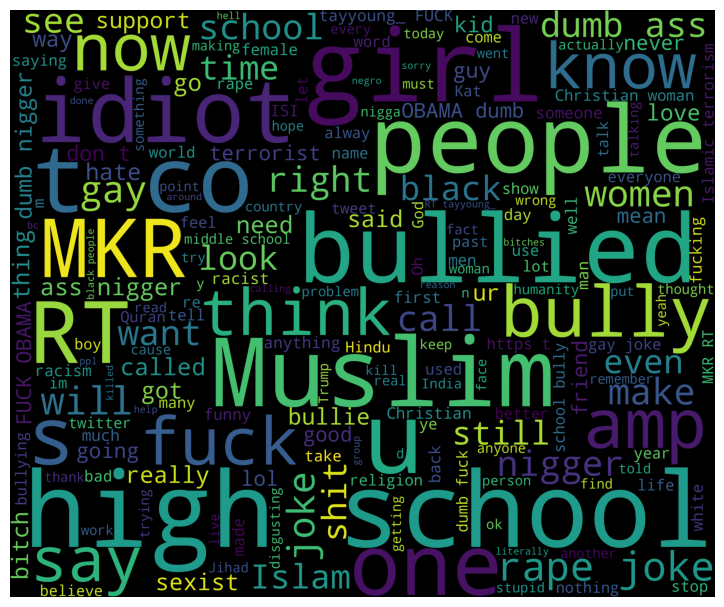

In [37]:
# sourced: https://habr.com/ru/articles/538458/
from wordcloud import WordCloud
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='black',
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(df['text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

Мы построили облако слов для того, чтобы увидеть наиболее частотные слова, употребляемые в датасете. Мы можем видеть большое количество слов, которые потенциально могут быть свидетельством наличия буллинга в сообщении.

# Splitting

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(df['label'])
labels

array([3, 3, 3, ..., 3, 3, 3])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['filtered_text'], labels, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41273,), (10319,), (41273,), (10319,))

# Fitting Models

## Plotting

In [40]:
def plot_samples(x, y, ax, vectorizer_name: str):
  ax.scatter(x[:, 0], x[:, 1], c=y, alpha=0.8, edgecolor="k", cmap='Set1')
  ax.set_title(f"{vectorizer_name} samples")

In [57]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

def plot_decision_function(
    x,
    y,
    ax,
    clf,
    clf_name: str,
    ):
  title = f"Classifying with {clf_name}"
  if isinstance(clf, MultinomialNB):
    scaler = MinMaxScaler()
    clf.fit(scaler.fit_transform(x), y)
  else:
    clf.fit(x, y)

  plot_step = 0.02
  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx, yy = np.meshgrid(
      np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
  )

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.4, cmap='Set1')
  ax.scatter(x[:, 0], x[:, 1], alpha=0.8, c=y, edgecolor="k", cmap='Set1')
  if title is not None:
      ax.set_title(title)

## TF-IDF Vectorizer

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

def make_pipeline_tfidf(classifier):
  pipeline = make_pipeline(
    TfidfVectorizer(
        max_features=1000,
        ngram_range=(1,3)
        ),
    classifier
    )
  return pipeline.fit(X_train, y_train)

In [43]:
# dictionaries for statistic research
fitting_time_tfidf = {}
prediction_time_tfidf = {}
quality_tfidf = {}

### Texts Distribution

Построим график для наглядности

In [89]:
from sklearn.decomposition import PCA

def reduce_dimensionality(embeddings):
  pca = PCA(2, random_state=0)
  return pca.fit_transform(embeddings)

In [133]:
from sklearn.decomposition import PCA

embs_tfidf_pca = reduce_dimensionality(
    TfidfVectorizer(
        max_features=1000,
        ngram_range=(1,3)
        ).fit_transform(X_test).toarray()
    )

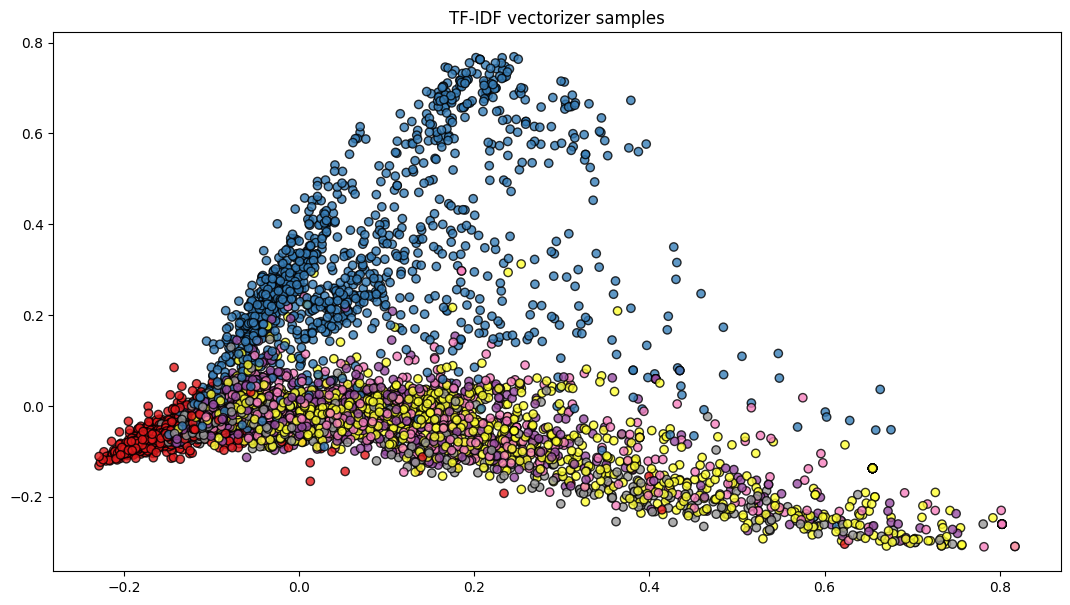

In [134]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 7))
plot_samples(embs_tfidf_pca, y_test, ax, 'TF-IDF vectorizer')

### KNClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Fitting

In [ ]:
%%time
# TF-IDF + KNClassifier
tf_idf_kn_clf = make_pipeline_tfidf(KNeighborsClassifier(n_jobs=-1))

CPU times: user 6.85 s, sys: 388 ms, total: 7.24 s
Wall time: 7.79 s


In [ ]:
fitting_time_tfidf['KNC'] = 6.85

#### Prediction

In [ ]:
%%time
kn_pred = tf_idf_kn_clf.predict(X_test)

CPU times: user 3min 59s, sys: 183 ms, total: 4min
Wall time: 2min 33s


In [ ]:
prediction_time_tfidf['KNC'] = 3 * 60 + 59

#### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(kn_pred, y_test))

              precision    recall  f1-score   support

           0       0.36      0.95      0.52       554
           1       0.51      0.96      0.67       773
           2       0.47      0.75      0.58       880
           3       0.42      0.43      0.43      1356
           4       0.61      0.19      0.28      4805
           5       0.14      0.93      0.24       206

    accuracy                           0.42      8574
   macro avg       0.42      0.70      0.45      8574
weighted avg       0.53      0.42      0.39      8574



In [ ]:
quality_tfidf['KNC'] = 0.42

#### Plotting

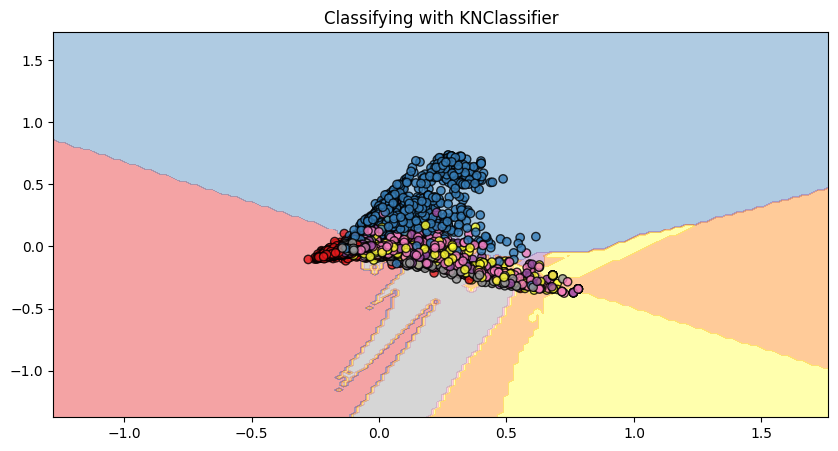

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_tfidf_pca, y_test, ax, tf_idf_kn_clf['kneighborsclassifier'], 'KNClassifier')

### **[UPD]** Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

#### Fitting

In [135]:
%%time
# TF-IDF + Logistic Regression
tf_idf_logreg_clf = make_pipeline_tfidf(LogisticRegression(random_state=0, max_iter=500))

CPU times: user 13.5 s, sys: 219 ms, total: 13.7 s
Wall time: 14.9 s


In [49]:
fitting_time_tfidf['LogReg'] = 13.7

#### Prediction

In [136]:
%%time
logreg_pred = tf_idf_logreg_clf.predict(X_test)

CPU times: user 1.08 s, sys: 8.97 ms, total: 1.09 s
Wall time: 1.22 s


In [51]:
prediction_time_tfidf['LogReg'] = 1.09

#### Estimation

In [52]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(logreg_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1600
           1       0.98      0.98      0.98      1618
           2       0.78      0.89      0.83      1501
           3       0.76      0.65      0.70      2967
           4       0.45      0.55      0.49       976
           5       0.91      0.93      0.92      1657

    accuracy                           0.82     10319
   macro avg       0.81      0.83      0.81     10319
weighted avg       0.83      0.82      0.82     10319



In [54]:
quality_tfidf['LogReg'] = 0.81

#### Plotting

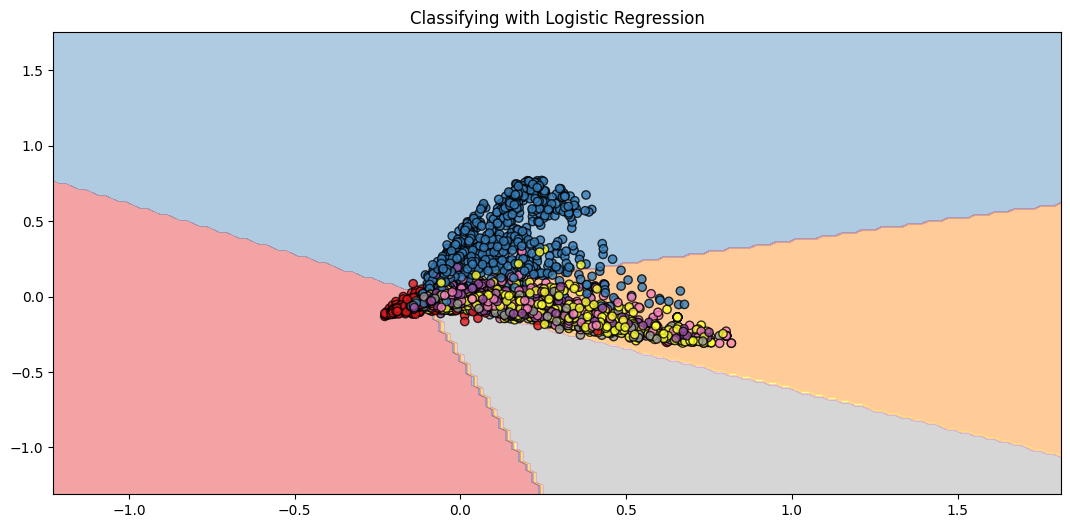

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 6))
plot_decision_function(embs_tfidf_pca, y_test, ax, tf_idf_logreg_clf['logisticregression'], 'Logistic Regression')

### Support Vector Machines

#### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

##### Fitting

In [ ]:
%%time
# TF-IDF + SVC
tf_idf_svc_clf = make_pipeline_tfidf(SVC(random_state=0))

CPU times: user 2min 18s, sys: 749 ms, total: 2min 19s
Wall time: 2min 23s


In [ ]:
fitting_time_tfidf['SVC'] = 2 * 60 + 18

##### Prediction

In [ ]:
%%time
svc_pred = tf_idf_svc_clf.predict(X_test)

CPU times: user 34.3 s, sys: 35.1 ms, total: 34.3 s
Wall time: 37.4 s


In [ ]:
prediction_time_tfidf['SVC'] = 34.3

##### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1459
           1       0.98      0.99      0.99      1447
           2       0.81      0.92      0.86      1251
           3       0.50      0.57      0.53      1223
           4       0.71      0.57      0.63      1819
           5       0.94      0.97      0.95      1375

    accuracy                           0.82      8574
   macro avg       0.82      0.83      0.82      8574
weighted avg       0.82      0.82      0.82      8574



In [ ]:
quality_tfidf['SVC'] = 0.82

##### Plotting

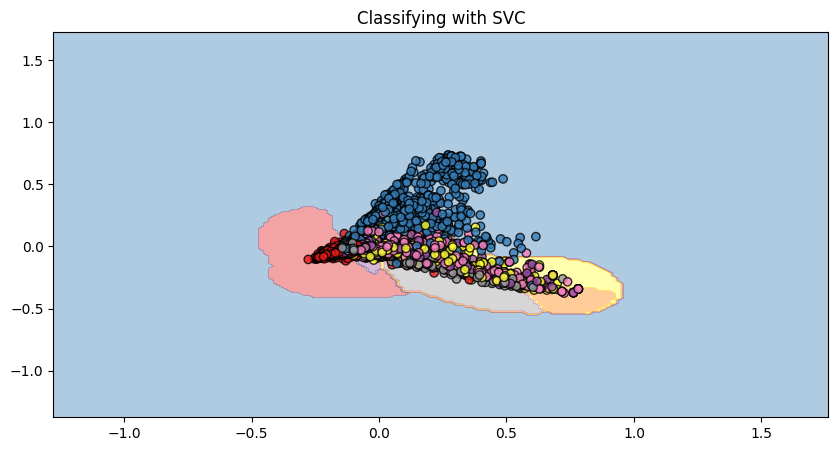

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_tfidf_pca, y_test, ax, tf_idf_svc_clf['svc'], 'SVC')

#### Linear Support Vector Classifier

In [ ]:
from sklearn.svm import LinearSVC

##### Fitting

In [ ]:
%%time
# TF-IDF + Linear SVC
tf_idf_lsvc_clf = make_pipeline_tfidf(LinearSVC(random_state=0))

CPU times: user 7.34 s, sys: 241 ms, total: 7.58 s
Wall time: 7.67 s


In [ ]:
fitting_time_tfidf['LSVC'] = 7.34

##### Prediction

In [ ]:
%%time
lsvc_pred = tf_idf_lsvc_clf.predict(X_test)

CPU times: user 834 ms, sys: 3.95 ms, total: 838 ms
Wall time: 860 ms


In [ ]:
prediction_time_tfidf['LSVC'] = 0.834

##### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(lsvc_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1472
           1       0.98      0.97      0.98      1467
           2       0.82      0.89      0.85      1312
           3       0.52      0.59      0.55      1237
           4       0.68      0.59      0.63      1675
           5       0.95      0.95      0.95      1411

    accuracy                           0.82      8574
   macro avg       0.82      0.83      0.82      8574
weighted avg       0.83      0.82      0.82      8574



In [ ]:
quality_tfidf['LSVC'] = 0.82

##### Plotting

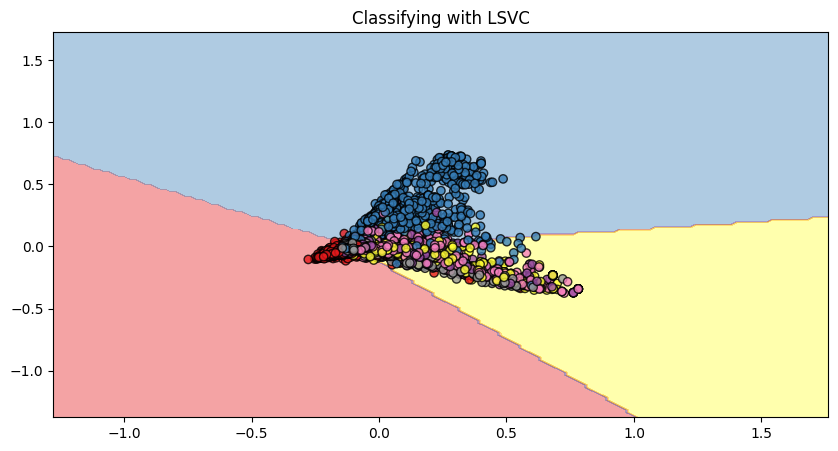

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_tfidf_pca, y_test, ax, tf_idf_lsvc_clf['linearsvc'], 'LSVC')

### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#### Fitting

In [ ]:
%%time
# TF-IDF + Multinomial NB
tf_idf_mnb_clf = make_pipeline_tfidf(MultinomialNB())

CPU times: user 6.49 s, sys: 308 ms, total: 6.8 s
Wall time: 6.84 s


In [ ]:
fitting_time_tfidf['Multinomial NB'] = 6.49

#### Prediction

In [ ]:
%%time
mnb_pred = tf_idf_mnb_clf.predict(X_test)

CPU times: user 489 ms, sys: 39 µs, total: 490 ms
Wall time: 493 ms


In [ ]:
prediction_time_tfidf['Multinomial NB'] = 0.489

#### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(mnb_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1535
           1       0.89      0.92      0.90      1402
           2       0.74      0.89      0.81      1177
           3       0.46      0.55      0.50      1179
           4       0.60      0.56      0.58      1567
           5       0.94      0.77      0.85      1714

    accuracy                           0.76      8574
   macro avg       0.76      0.76      0.76      8574
weighted avg       0.78      0.76      0.77      8574



In [ ]:
quality_tfidf['Multinomial NB'] = 0.76

#### Plotting

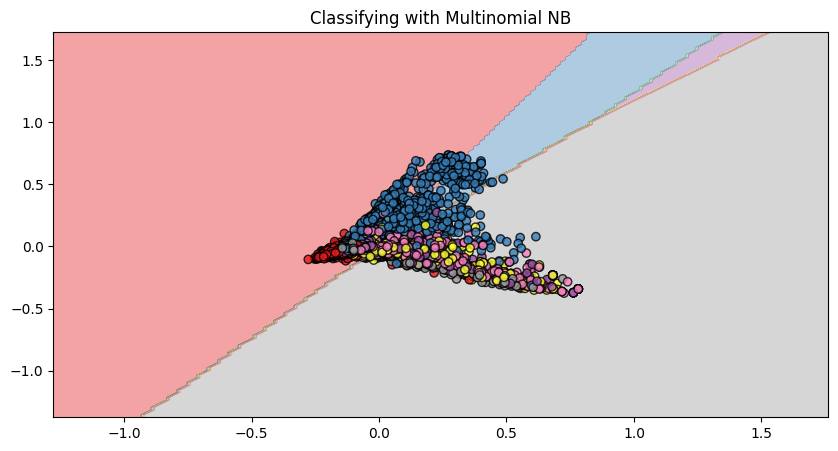

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_tfidf_pca, y_test, ax, tf_idf_mnb_clf['multinomialnb'], 'Multinomial NB')

### Decision Trees

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

##### Fitting

In [ ]:
%%time
# TF-IDF + Decision Tree
tf_idf_tree_clf = make_pipeline_tfidf(DecisionTreeClassifier(random_state=0))

CPU times: user 11.8 s, sys: 159 ms, total: 12 s
Wall time: 12 s


In [ ]:
fitting_time_tfidf['Decision Tree'] = 11.8

##### Prediction

In [ ]:
%%time
tree_pred = tf_idf_tree_clf.predict(X_test)

CPU times: user 478 ms, sys: 5 µs, total: 478 ms
Wall time: 481 ms


In [ ]:
prediction_time_tfidf['Decision Tree'] = 0.478

##### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(tree_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1436
           1       0.97      0.97      0.97      1443
           2       0.82      0.83      0.82      1397
           3       0.49      0.45      0.47      1509
           4       0.47      0.49      0.48      1399
           5       0.92      0.93      0.92      1390

    accuracy                           0.77      8574
   macro avg       0.77      0.77      0.77      8574
weighted avg       0.77      0.77      0.77      8574



In [ ]:
quality_tfidf['Decision Tree'] = 0.77

##### Plotting

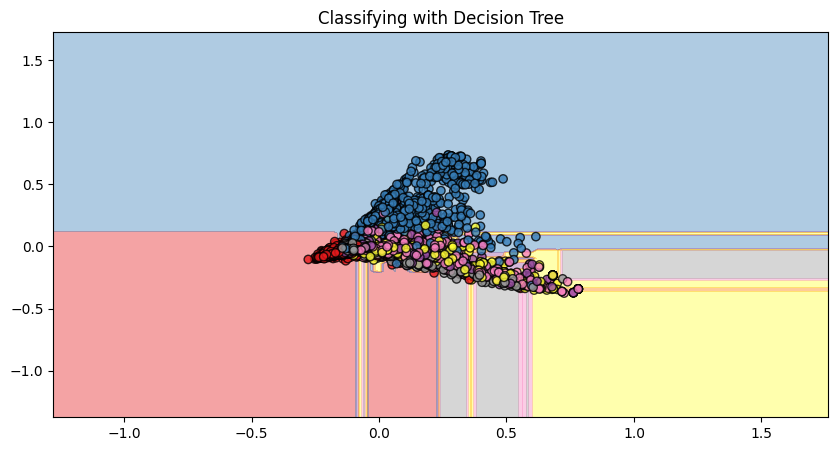

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_tfidf_pca, y_test, ax, tf_idf_tree_clf['decisiontreeclassifier'], 'Decision Tree')

##### Tree Visualization

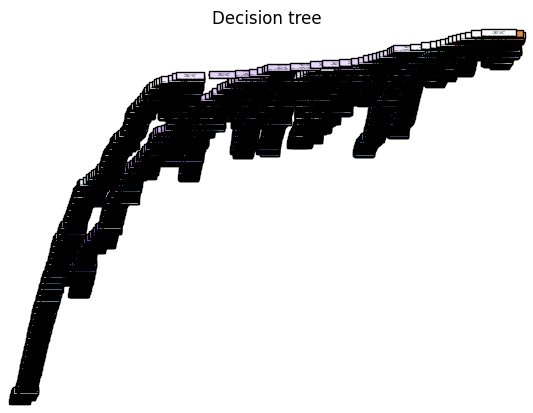

In [ ]:
plt.figure()
plot_tree(tf_idf_tree_clf['decisiontreeclassifier'], filled=True)
plt.title("Decision tree")
plt.show()

P.S. Изначально мы строили визуализацию дерева как вспомогательный инструмент для подбора параметров глубины и ширины для *Random Forest Classifier*, однако впоследствии мы решили отказаться от этой идеи, поскольку пришли к решению сравнивать на данном этапе модели, обученные со стандартным набором гиперпараметров. При этом мы решили не удалять графики, хоть они и являются малоинформативными, и мы нигде не используем их напрямую.

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

##### Fitting

In [ ]:
%%time
# TF-IDF + Random Forest
tf_idf_forest_clf = make_pipeline_tfidf(RandomForestClassifier(random_state=0))

CPU times: user 1min 15s, sys: 233 ms, total: 1min 15s
Wall time: 1min 15s


In [ ]:
fitting_time_tfidf['Random Forest'] = 60 + 15

##### Prediction

In [ ]:
%%time
forest_pred = tf_idf_forest_clf.predict(X_test)

CPU times: user 805 ms, sys: 2.99 ms, total: 808 ms
Wall time: 814 ms


In [ ]:
prediction_time_tfidf['Random Forest'] = 0.805

##### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(forest_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1446
           1       0.98      0.99      0.98      1450
           2       0.82      0.90      0.86      1286
           3       0.48      0.55      0.51      1235
           4       0.66      0.54      0.59      1760
           5       0.95      0.96      0.96      1397

    accuracy                           0.81      8574
   macro avg       0.81      0.82      0.81      8574
weighted avg       0.81      0.81      0.81      8574



In [ ]:
quality_tfidf['Random Forest'] = 0.81

##### Plotting

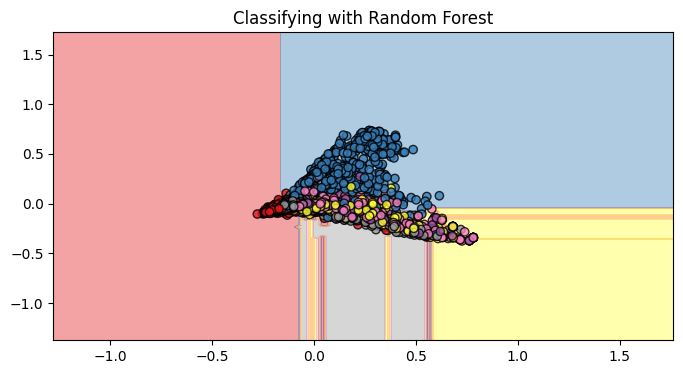

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_tfidf_pca, y_test, ax, tf_idf_forest_clf['randomforestclassifier'], 'Random Forest')

### Choosing Best Model

By default parameters results

In [ ]:
# Fitting time
for k, v in sorted(fitting_time_tfidf.items(), key=lambda item: item[1]):
  print(f'{k}: {v}')

Multinomial NB: 6.49
KNC: 6.85
LSVC: 7.34
LogReg: 9.62
Decision Tree: 11.8
Random Forest: 75
SVC: 138


In [ ]:
# Prediction time
for k, v in sorted(prediction_time_tfidf.items(), key=lambda item: item[1]):
  print(f'{k}: {v}')

LogReg: 0.462
Decision Tree: 0.478
Multinomial NB: 0.489
Random Forest: 0.805
LSVC: 0.834
SVC: 34.3
KNC: 239


In [ ]:
# Quality
for k, v in sorted(quality_tfidf.items(), key=lambda item: item[1], reverse=True):
  print(f'{k}: {v}')

LogReg: 0.82
SVC: 0.82
LSVC: 0.82
Random Forest: 0.81
Decision Tree: 0.77
Multinomial NB: 0.76
KNC: 0.42


Таким образом, видно, что логистическая регрессия показывает высокий результат и минимальные затраты времени на классификацию. Попробуем улучшить качество её работы, подобрав гиперпараметры.

### Finetuning a Best-Performing Model

In [62]:
from sklearn.model_selection import RandomizedSearchCV

def finetune(x, y, pipeline_function, model, param_grid):
  clf = pipeline_function(
      RandomizedSearchCV(
          model,
          param_grid,
          random_state=0,
          error_score='raise'
      )
  )
  return clf.fit(x, y)

In [63]:
tfidf_logreg_params = {
    'penalty': (
        'l2',
        None
        ),
    'C': (
        0.1,
        0.5,
        1.0,
        1.5,
        2.0,
        ),
    'class_weight': (
        'balanced',
        None
    ),
    'solver': (
        'lbfgs',
        'newton-cholesky',
        'newton-cg',
        'sag',
        'saga'
    )
}

tf_idf_logreg_finetuned_clf = finetune(
    X_train,
    y_train,
    make_pipeline_tfidf,
    LogisticRegression(
        random_state=0,
        max_iter=500
        ),
    tfidf_logreg_params
    )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=3.09305e-20): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to 

#### Get Params

In [64]:
tf_idf_logreg_finetuned_clf['randomizedsearchcv'].best_params_

{'solver': 'sag', 'penalty': 'l2', 'class_weight': None, 'C': 2.0}

#### Quality Estimation

In [65]:
tf_idf_logreg_finetuned_pred = tf_idf_logreg_finetuned_clf.predict(X_test)
print(classification_report(tf_idf_logreg_finetuned_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1596
           1       0.98      0.98      0.98      1614
           2       0.78      0.88      0.83      1523
           3       0.75      0.65      0.69      2903
           4       0.46      0.54      0.50      1016
           5       0.91      0.92      0.92      1667

    accuracy                           0.82     10319
   macro avg       0.81      0.82      0.81     10319
weighted avg       0.82      0.82      0.82     10319



##### Plotting

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

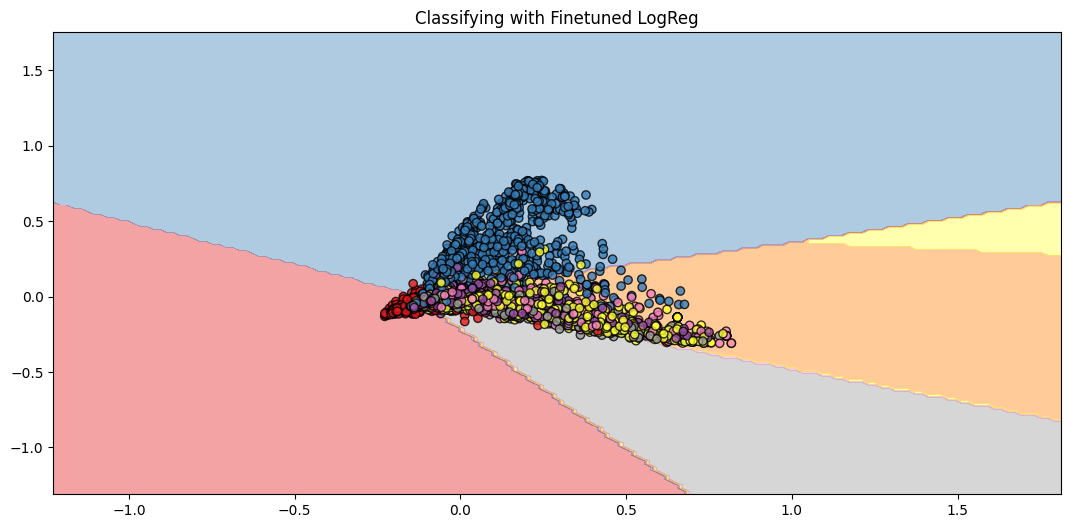

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 6))
plot_decision_function(embs_tfidf_pca, y_test, ax, tf_idf_logreg_finetuned_clf['randomizedsearchcv'], 'Finetuned LogReg')

Сравнение показателей настроенной и ненастроенной моделей не показал разницы. Улучшить качество работы модели не удалось.

Итоговое качество работы модели — 81%.

#### Save Finetuned Model

In [67]:
import pickle

with open('tf_idf_logreg_finetuned_new.pkl','wb') as f:
    pickle.dump(tf_idf_logreg_finetuned_clf, f)

## Count Vectorizer

In [164]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

def make_pipeline_cvec(classifier):
  pipeline = make_pipeline(
    CountVectorizer(
        max_features=1000,
        ngram_range=(1,3)
        ),
    classifier
    )
  return pipeline.fit(X_train, y_train)

In [69]:
# dictionaries for statistic research
fitting_time_cvec = {}
prediction_time_cvec = {}
quality_cvec = {}

### Texts Distribution

Построим график для наглядности

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def reduce_dimensionality(embeddings):
  pca = PCA(2, random_state=0)
  return pca.fit_transform(embeddings)

In [158]:
from sklearn.decomposition import PCA

embs_cvec_pca = reduce_dimensionality(
    CountVectorizer(
        max_features=1000,
        ngram_range=(1,3)
        ).fit_transform(X_test).toarray()
    )

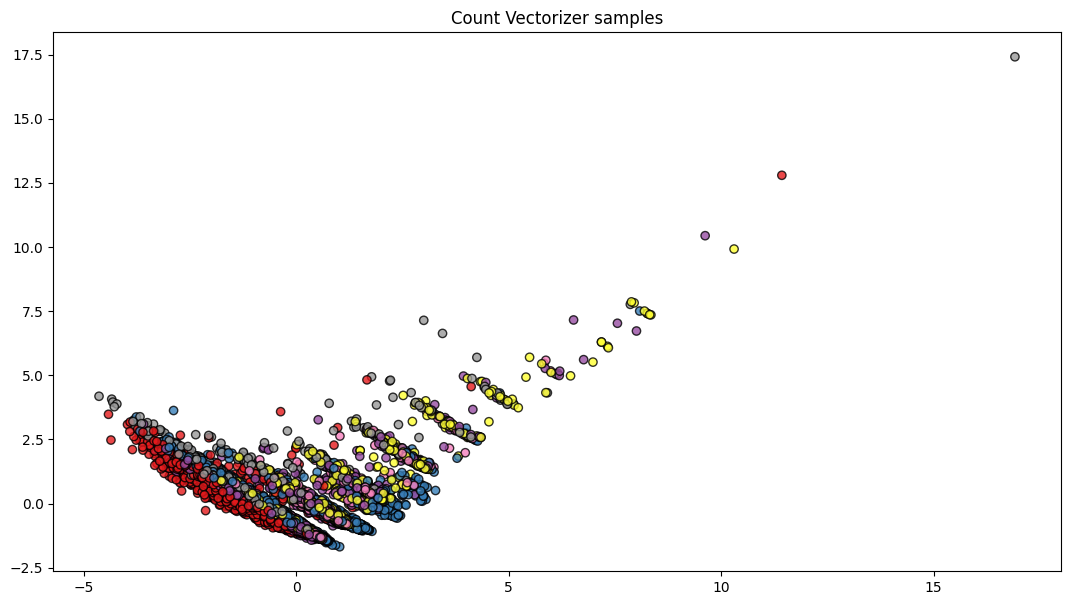

In [159]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 7))
plot_samples(embs_cvec_pca, y_test, ax, 'Count Vectorizer')

### KNClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Pipeline

In [ ]:
%%time
# Count Vectorizer + KNClassifier
cvec_kn_clf = make_pipeline_cvec(KNeighborsClassifier(n_jobs=-1))

CPU times: user 7.05 s, sys: 162 ms, total: 7.21 s
Wall time: 7.29 s


In [ ]:
fitting_time_cvec['KNC'] = 7.05

#### Prediction

In [ ]:
%%time
kn_pred_cvec = cvec_kn_clf.predict(X_test)

CPU times: user 23.5 s, sys: 5.8 s, total: 29.3 s
Wall time: 23.8 s


In [ ]:
prediction_time_cvec['KNC'] = 23.5

#### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(kn_pred_cvec, y_test))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1264
           1       0.78      0.97      0.86      1166
           2       0.67      0.79      0.73      1201
           3       0.60      0.33      0.42      2584
           4       0.46      0.38      0.41      1758
           5       0.40      0.95      0.57       601

    accuracy                           0.63      8574
   macro avg       0.63      0.73      0.65      8574
weighted avg       0.63      0.63      0.60      8574



In [ ]:
quality_cvec['KNC'] = 0.63

#### Plotting

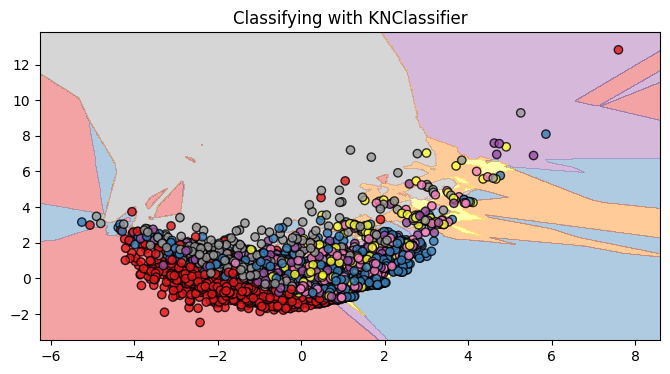

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_cvec_pca, y_test, ax, cvec_kn_clf['kneighborsclassifier'], 'KNClassifier')

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#### Fitting

In [ ]:
%%time
# Count Vectorizer + Logistic Regression
cvec_logreg_clf = make_pipeline_cvec(LogisticRegression(random_state=0, max_iter=500))

CPU times: user 12.3 s, sys: 185 ms, total: 12.5 s
Wall time: 12.5 s


In [ ]:
fitting_time_cvec['LogReg'] = 12.3

#### Prediction

In [ ]:
%%time
logreg_pred_cvec = cvec_logreg_clf.predict(X_test)

CPU times: user 549 ms, sys: 932 µs, total: 550 ms
Wall time: 554 ms


In [ ]:
prediction_time_cvec['LogReg'] = 0.549

#### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(cvec_logreg_clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1455
           1       0.98      0.98      0.98      1447
           2       0.81      0.89      0.85      1296
           3       0.53      0.57      0.55      1310
           4       0.67      0.58      0.62      1679
           5       0.94      0.96      0.95      1387

    accuracy                           0.82      8574
   macro avg       0.82      0.83      0.82      8574
weighted avg       0.82      0.82      0.82      8574



In [ ]:
quality_cvec['LogReg'] = 0.82

#### Plotting

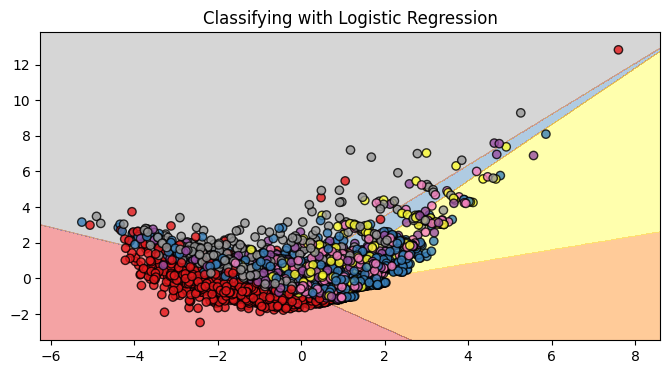

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_cvec_pca, y_test, ax, cvec_logreg_clf['logisticregression'], 'Logistic Regression')

### Support Vector Machines

#### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

##### Fitting

In [ ]:
%%time
# Count Vectorizer + SVC
cvec_svc_clf = make_pipeline_cvec(SVC(random_state=0))

CPU times: user 2min 22s, sys: 857 ms, total: 2min 23s
Wall time: 2min 26s


In [ ]:
fitting_time_cvec['SVC'] = 2 * 60 + 22

##### Prediction

In [ ]:
%%time
svc_pred_cvec = cvec_svc_clf.predict(X_test)

CPU times: user 36.7 s, sys: 22.1 ms, total: 36.7 s
Wall time: 37 s


In [ ]:
prediction_time_cvec['SVC'] = 36.7

##### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(svc_pred_cvec, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1441
           1       0.98      0.99      0.98      1441
           2       0.81      0.92      0.86      1246
           3       0.43      0.66      0.52       913
           4       0.83      0.56      0.67      2150
           5       0.94      0.96      0.95      1383

    accuracy                           0.83      8574
   macro avg       0.83      0.84      0.83      8574
weighted avg       0.85      0.83      0.83      8574



In [ ]:
quality_cvec['SVC'] = 0.83

##### Plotting

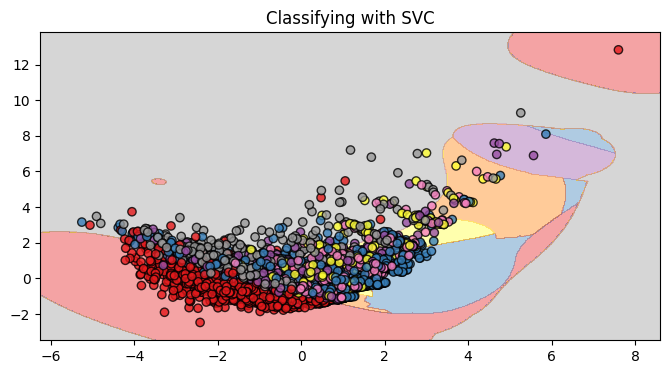

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_cvec_pca, y_test, ax, cvec_svc_clf['svc'], 'SVC')

#### **[UPD]** Linear Support Vector Classifier

In [73]:
from sklearn.svm import LinearSVC

##### Fitting

In [165]:
%%time
# Count Vectorizer + Linear SVC
cvec_lsvc_clf = make_pipeline_cvec(LinearSVC(random_state=0))

CPU times: user 30.9 s, sys: 308 ms, total: 31.2 s
Wall time: 31.8 s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [75]:
fitting_time_cvec['LSVC'] = 31.2

##### Prediction

In [166]:
%%time
lsvc_pred_cvec = cvec_lsvc_clf.predict(X_test)

CPU times: user 1.15 s, sys: 4.88 ms, total: 1.15 s
Wall time: 1.89 s


In [77]:
prediction_time_cvec['LSVC'] = 1.15

##### Estimation

In [78]:
from sklearn.metrics import classification_report

In [167]:
print(classification_report(lsvc_pred_cvec, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1603
           1       0.98      0.97      0.98      1624
           2       0.77      0.89      0.83      1501
           3       0.77      0.65      0.71      2996
           4       0.43      0.56      0.49       933
           5       0.92      0.93      0.93      1662

    accuracy                           0.82     10319
   macro avg       0.81      0.83      0.82     10319
weighted avg       0.83      0.82      0.82     10319



In [80]:
quality_cvec['LSVC'] = 0.82

##### Plotting

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


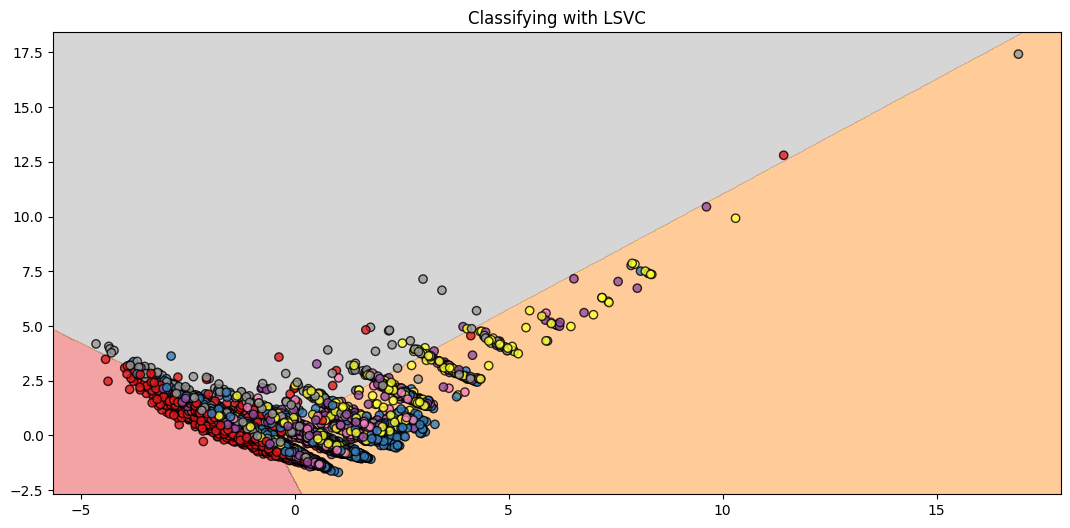

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 6))
plot_decision_function(embs_cvec_pca, y_test, ax, cvec_lsvc_clf['linearsvc'], 'LSVC')

### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#### Fitting

In [ ]:
%%time
# Count Vectorizer + Multinomial NB
cvec_mnb_clf = make_pipeline_cvec(MultinomialNB())

CPU times: user 7.2 s, sys: 125 ms, total: 7.32 s
Wall time: 7.37 s


In [ ]:
fitting_time_cvec['Multinomial NB'] = 7.2

#### Prediction

In [ ]:
%%time
mnb_pred_cvec = cvec_mnb_clf.predict(X_test)

CPU times: user 513 ms, sys: 0 ns, total: 513 ms
Wall time: 519 ms


In [ ]:
prediction_time_cvec['Multinomial NB'] = 0.513

#### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(mnb_pred_cvec, y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1547
           1       0.90      0.92      0.91      1423
           2       0.73      0.92      0.81      1124
           3       0.50      0.52      0.51      1348
           4       0.60      0.57      0.58      1520
           5       0.91      0.79      0.85      1612

    accuracy                           0.76      8574
   macro avg       0.76      0.77      0.76      8574
weighted avg       0.77      0.76      0.76      8574



In [ ]:
quality_cvec['Multinomial NB'] = 0.76

#### Plotting

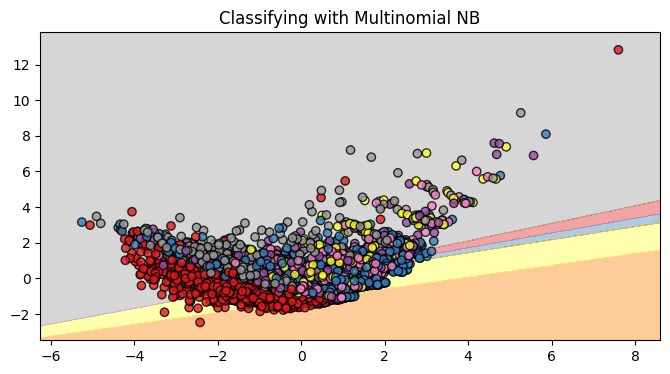

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_cvec_pca, y_test, ax, cvec_mnb_clf['multinomialnb'], 'Multinomial NB')

### Decision Trees

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

##### Fitting

In [ ]:
%%time
# Count Vectorizer + Decision Tree
cvec_tree_clf = make_pipeline_cvec(DecisionTreeClassifier(random_state=0))

CPU times: user 11.4 s, sys: 172 ms, total: 11.6 s
Wall time: 11.6 s


In [ ]:
fitting_time_cvec['Decision Tree'] = 11.4

##### Prediction

In [ ]:
%%time
tree_pred_cvec = cvec_tree_clf.predict(X_test)

CPU times: user 569 ms, sys: 4.79 ms, total: 573 ms
Wall time: 577 ms


In [ ]:
prediction_time_cvec['Decision Tree'] = 0.569

##### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(tree_pred_cvec, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1457
           1       0.97      0.98      0.97      1440
           2       0.83      0.83      0.83      1420
           3       0.47      0.45      0.46      1458
           4       0.49      0.50      0.50      1417
           5       0.92      0.94      0.93      1382

    accuracy                           0.78      8574
   macro avg       0.78      0.78      0.78      8574
weighted avg       0.77      0.78      0.78      8574



In [ ]:
quality_cvec['Decision Tree'] = 0.78

##### Plotting

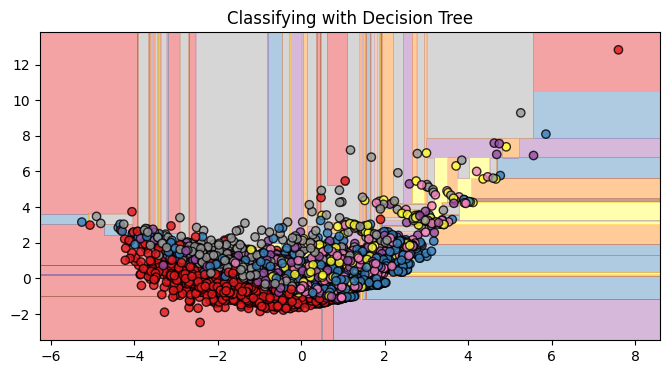

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_cvec_pca, y_test, ax, cvec_tree_clf['decisiontreeclassifier'], 'Decision Tree')

##### Tree Visualization

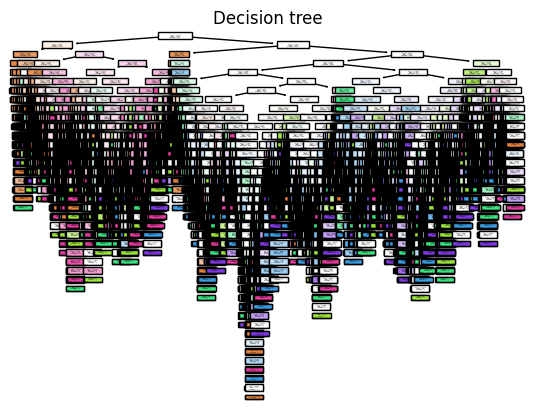

In [ ]:
plt.figure()
plot_tree(cvec_tree_clf['decisiontreeclassifier'], filled=True)
plt.title("Decision tree")
plt.show()

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

##### Fitting

In [ ]:
%%time
# Count Vectorizer + Random Forest
cvec_forest_clf = make_pipeline_cvec(RandomForestClassifier(random_state=0))

CPU times: user 1min 15s, sys: 431 ms, total: 1min 15s
Wall time: 1min 16s


In [ ]:
fitting_time_cvec['Random Forest'] = 60 + 15

##### Prediction

In [ ]:
%%time
forest_pred_cvec = cvec_forest_clf.predict(X_test)

CPU times: user 905 ms, sys: 3.72 ms, total: 908 ms
Wall time: 917 ms


In [ ]:
prediction_time_cvec['Random Forest'] = 0.905

##### Estimation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(forest_pred_cvec, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1446
           1       0.98      0.99      0.98      1446
           2       0.82      0.89      0.86      1300
           3       0.50      0.54      0.52      1312
           4       0.63      0.55      0.59      1677
           5       0.95      0.96      0.96      1393

    accuracy                           0.81      8574
   macro avg       0.81      0.82      0.81      8574
weighted avg       0.81      0.81      0.81      8574



In [ ]:
quality_cvec['Random Forest'] = 0.81

##### Plotting

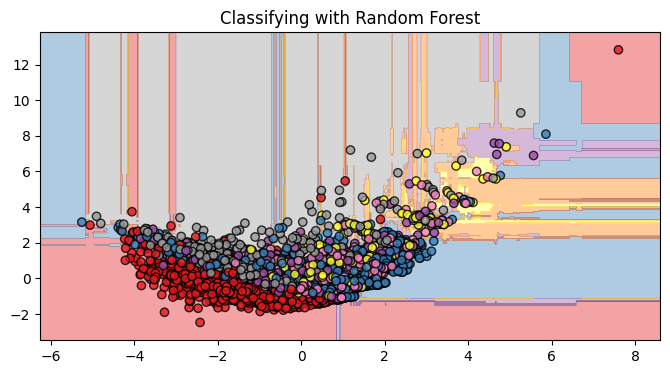

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_cvec_pca, y_test, ax, cvec_forest_clf['randomforestclassifier'], 'Random Forest')

### Choosing Best Model

By default parameters results

In [ ]:
# Fitting time
for k, v in sorted(fitting_time_cvec.items(), key=lambda item: item[1]):
  print(f'{k}: {v}')

KNC: 7.05
Multinomial NB: 7.2
Decision Tree: 11.4
LogReg: 12.3
LSVC: 17.3
Random Forest: 75
SVC: 142


In [ ]:
# Prediction time
for k, v in sorted(prediction_time_cvec.items(), key=lambda item: item[1]):
  print(f'{k}: {v}')

Multinomial NB: 0.513
LogReg: 0.549
LSVC: 0.549
Decision Tree: 0.569
Random Forest: 0.905
KNC: 23.5
SVC: 36.7


In [ ]:
# Quality
for k, v in sorted(quality_cvec.items(), key=lambda item: item[1], reverse=True):
  print(f'{k}: {v}')

SVC: 0.83
LSVC: 0.83
LogReg: 0.82
Random Forest: 0.81
Decision Tree: 0.78
Multinomial NB: 0.76
KNC: 0.63


Нас не так сильно интересует время обучения модели, поскольку дообученную модель мы в итоге сохраним. Выбирая модель, показывающую высокие результаты качества и скорости классификации, мы остановили свой выбор на *linear SVC*, сочетающей высокую точность и достаточно большую скорость.

### Finetuning a Best-Performing Model

In [82]:
from sklearn.model_selection import RandomizedSearchCV

def finetune(x, y, pipeline_function, model, param_grid):
  clf = pipeline_function(
      RandomizedSearchCV(
          model,
          param_grid,
          random_state=0,
          error_score='raise'
      )
  )
  return clf.fit(x, y)

In [83]:
cvec_lsvc_params = {
    'loss': (
        'hinge',
        'squared_hinge'
    ),
    'C': (
        0.1,
        0.5,
        1.0,
        1.5
        ),
    'multi_class': (
        'ovr',
        'crammer_singer'
    ),
    'fit_intercept': (
        True,
        False
    ),
    'class_weight': (
        'balanced',
        None
    )
}

cvec_lsvc_finetuned_clf = finetune(
    X_train,
    y_train,
    make_pipeline_cvec,
    LinearSVC(
        random_state=0,
        max_iter=5000
        ),
    cvec_lsvc_params
    )

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

#### Get Params

In [84]:
cvec_lsvc_finetuned_clf['randomizedsearchcv'].best_params_

{'multi_class': 'ovr',
 'loss': 'hinge',
 'fit_intercept': True,
 'class_weight': None,
 'C': 1.0}

#### Quality Estimation

In [85]:
cvec_lsvc_finetuned_pred = cvec_lsvc_finetuned_clf.predict(X_test)
print(classification_report(cvec_lsvc_finetuned_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1591
           1       0.98      0.98      0.98      1626
           2       0.78      0.87      0.82      1530
           3       0.79      0.65      0.71      3060
           4       0.39      0.56      0.46       835
           5       0.93      0.93      0.93      1677

    accuracy                           0.82     10319
   macro avg       0.81      0.83      0.81     10319
weighted avg       0.84      0.82      0.83     10319



Итоговое качество работы модели — 81%.

##### Plotting

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

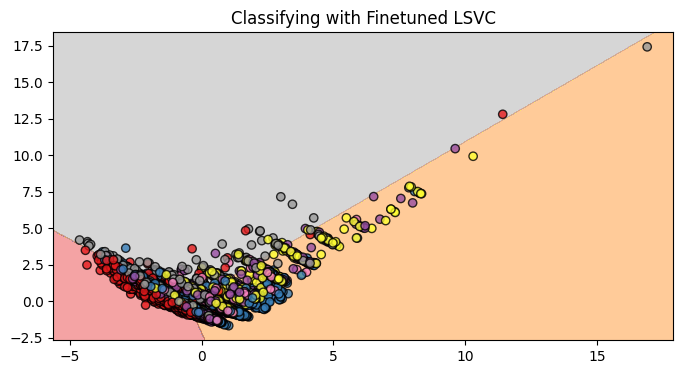

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plot_decision_function(embs_cvec_pca, y_test, ax, cvec_lsvc_finetuned_clf['randomizedsearchcv'], 'Finetuned LSVC')

Сравнение показателей настроенной и ненастроенной моделей не показал разницы. Улучшить качество работы модели не удалось.

#### Save Finetuned Model

In [87]:
import pickle

with open('cvec_lsvc_finetuned_new.pkl','wb') as f:
    pickle.dump(cvec_lsvc_finetuned_clf, f)